
<h2><center>National Health and Nutrition Examination Survey</center></h2>

This report is an analysis of the dataset – NHANES, with the intent of exploring both continuous and categorical variables and how they relate with one another. 

I began my analysis by comparing Age with the medical data levels of iron, TIBC, Albumin, and Hemoglobin. Levels of Iron, TIBC, and Albumin all decreased as the sample population aged. However, Hemoglobin levels increased as people aged, so I focused on Hemoglobin.


Warning message:
“Removed 759 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 759 rows containing missing values (geom_point).”

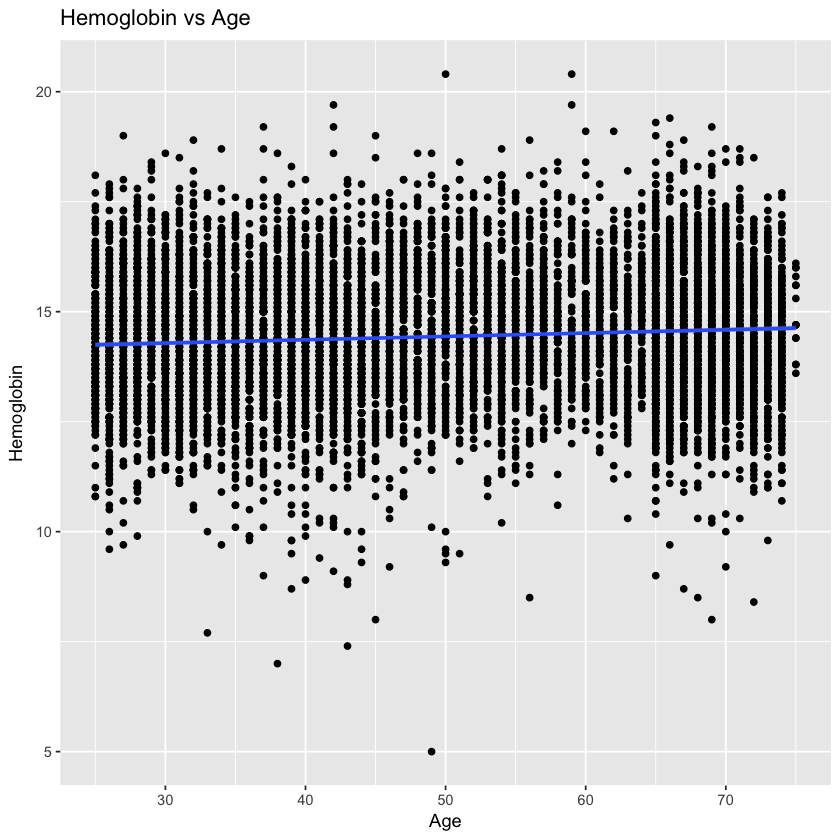

In [1]:
library(plyr)
load("NHANES.rdata")
library(ggplot2)

#Age vs Hemoglobin. increasing trend
ageIron = ggplot(NHANES, aes(Age, Hemoglobin))
ageIron + geom_point() + geom_smooth(method = "lm") + labs(title="Hemoglobin vs Age")


I next wanted to study the differences in categorical variables like race or gender with hemoglobin levels. The only consistent pattern I found was that for gender, males had higher hemoglobin levels. 

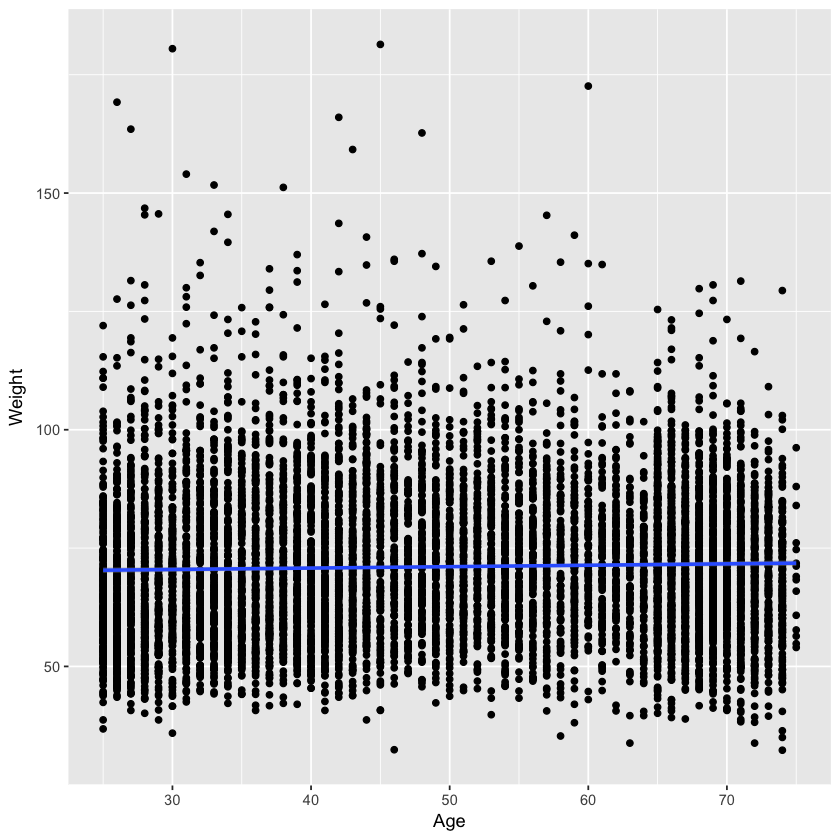

In [2]:
weight = ggplot(NHANES, aes(Age, Weight))
weight + geom_point() + geom_smooth(method = "lm")


Warning message:
“Removed 759 rows containing non-finite values (stat_boxplot).”

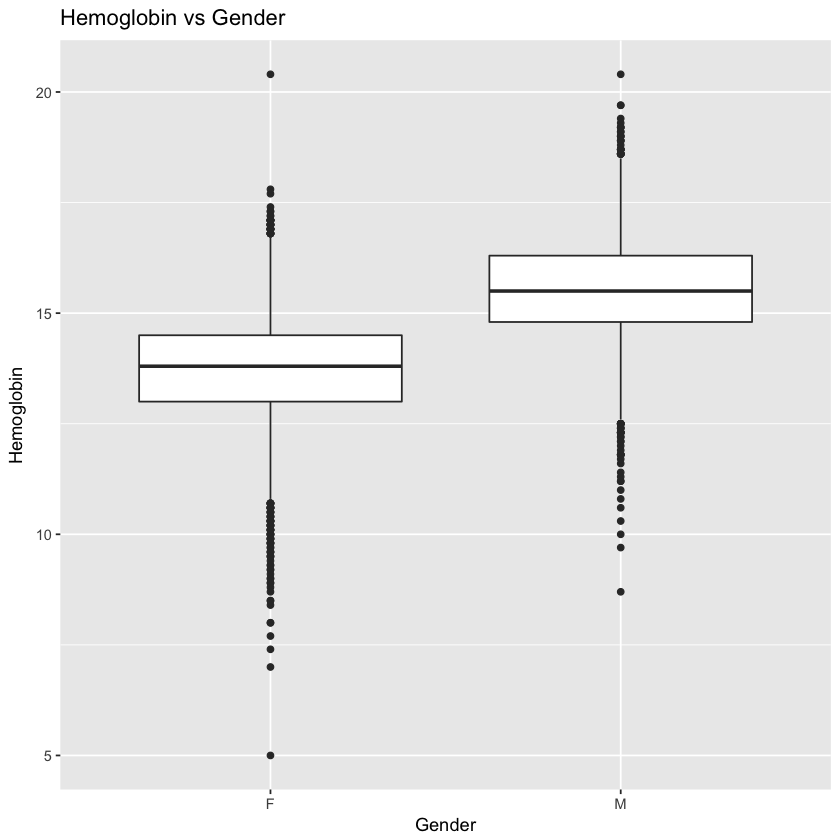

In [3]:
Gender=NHANES$Sex
levels(Gender)=c("Female","Male")

hemoglob = ggplot(NHANES, aes(Sex, Hemoglobin))
hemoglob + geom_boxplot() + labs(title="Hemoglobin vs Gender", x="Gender")

Based upon the results above, I wanted to explore whether smoking had any effect on Hemoglobin. I read medical resources from Mayo Clinic and learned that High hemoglobin levels are often the result of smoking or living in higher altitudes. The Mayo Clinic also said that higher levels of hemoglobin could lead to disorders like heart failure, lung disease, and liver cancer. My next step was to facet the data from Figure 2, and analyze whether or smoking induced higher levels of Hemoglobin.

Warning message:
“Removed 759 rows containing non-finite values (stat_boxplot).”

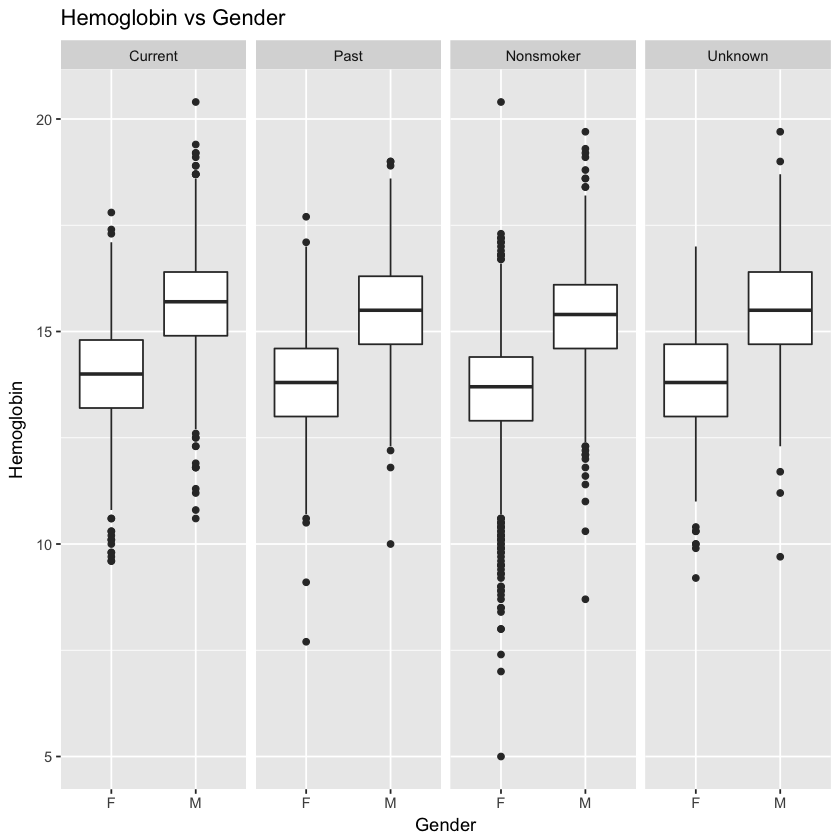

In [4]:
hemoglob + geom_boxplot() + facet_grid(.~Smoke) + labs(title="Hemoglobin vs Gender", x="Gender")

From Figure 3, it appears that there is little difference between the hemoglobin levels for all four categories of smokers. This was surprising, as I expected the hemoglobin levels for Current Smokers to be noticeably higher than the hemoglobin levels for Nonsmokers. 

ERROR: Error in eval(expr, envir, enclos): could not find function "mosaic"


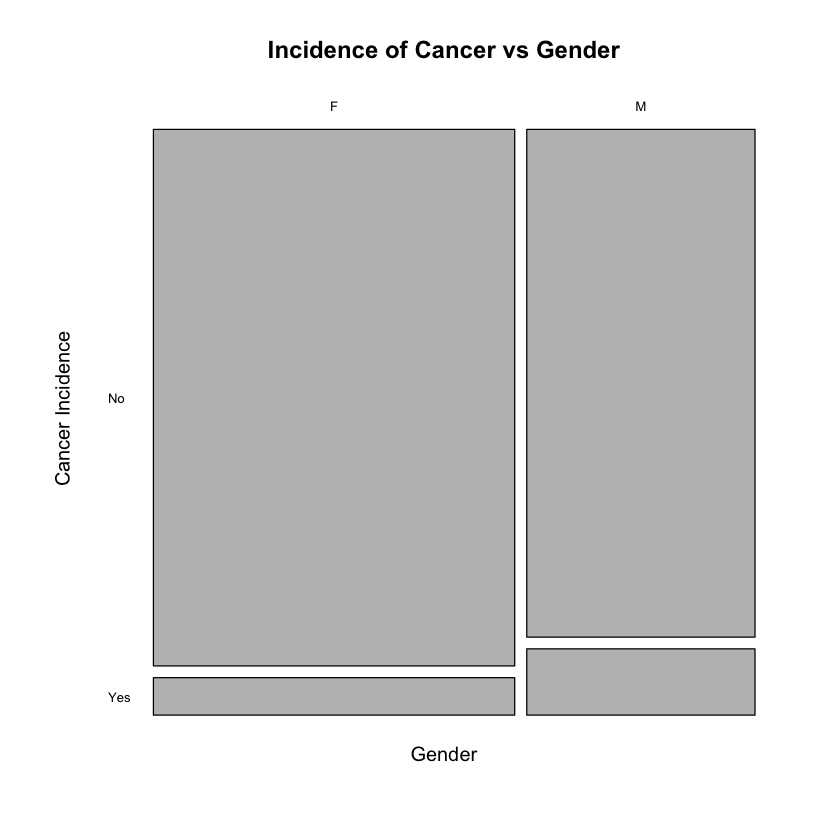

In [5]:
mosaicplot(~ Sex + Cancer.Incidence , las= 1, data = NHANES,main="Incidence of Cancer vs Gender", ylab="Cancer Incidence", xlab="Gender")
mosaic(~ Gender + Cancer.Incidence, data = NHANES,shade=T,main="Incidence of Cancer vs Gender")
mosaic(~ Smoke + Cancer.Incidence, data=NHANES, shade=T)

I decided to analyze cancer incidence to compare if incidences were higher for males or female. From my mosaic plot in Figure 4, I saw that the levels of cancer were indeed slightly higher for males. This caught my attention again, and I set out to explore the relationship between hemoglobin levels and cancer.  



Warning message:
“Removed 759 rows containing non-finite values (stat_boxplot).”

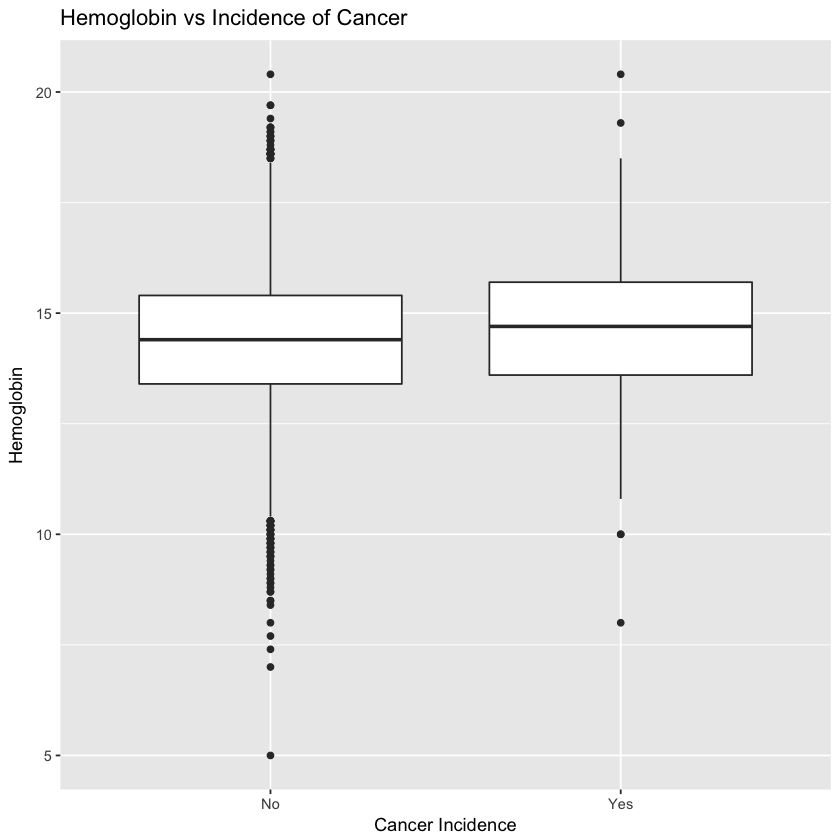

In [6]:
cancer = ggplot(NHANES, aes(Cancer.Incidence, Hemoglobin))
cancer + geom_boxplot() + labs(title="Hemoglobin vs Incidence of Cancer", x="Cancer Incidence") 



I analyzed Cancer Incidences with Hemoglobin levels, and both median Hemoglobin levels were around 14. However, closer analysis shows that the third quartile of Hemoglobin levels was higher when cancer was detected. This appears to support the research from the Mayo Clinic that people with cancer tend to have higher Hemoglobin levels. The difference was not significant, so I wanted to further examine what causes higher Hemoglobin levels. I chose to compare Hemoglobin levels with weight and saw that they had a positive relationship with one another. 

Warning message:
“Removed 759 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 759 rows containing non-finite values (stat_smooth).”

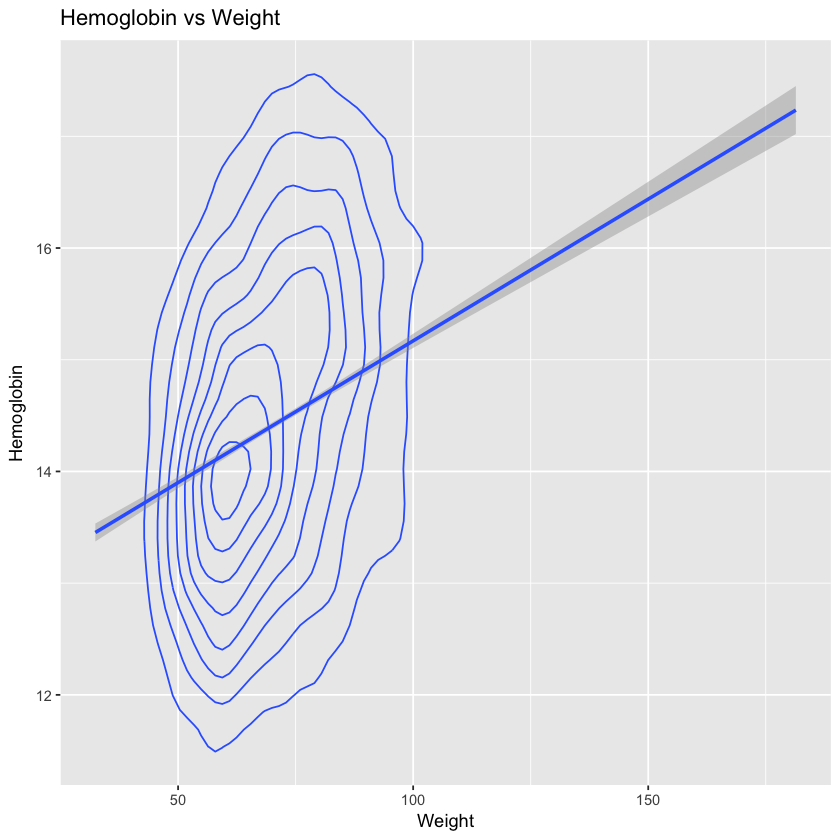

In [7]:
hemoglob = ggplot(NHANES, aes(Weight, Hemoglobin))
hemoglob + geom_density2d() + geom_smooth(method = "lm") + labs(title="Hemoglobin vs Weight")


Based off of my intuition, males are often heavier than females, so I analyzed Weight vs Gender and faceted it by Cancer.Incidence. As evidenced from Figure 7, males had the higher weight at the 25th, 50th and 75th percentiles. I used this to compare the results from Figure 4, which showed that cancer was found in a higher percentage of males than females. This supported my initial assumption from Figure 4 that weight indeed a factor.

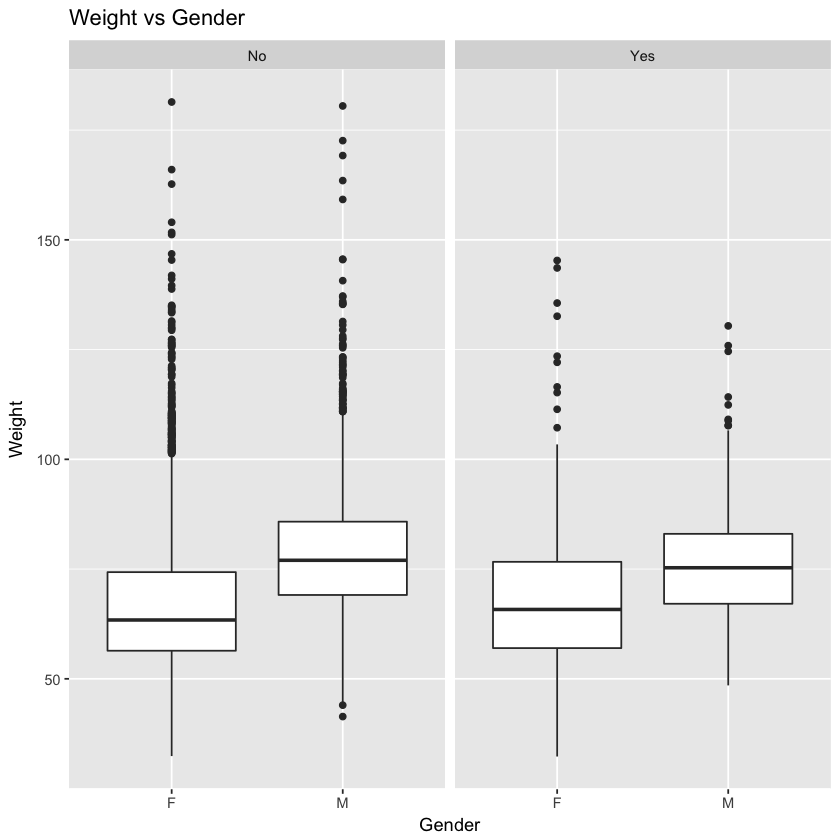

In [8]:
weight = ggplot(NHANES, aes(Sex, Weight))
weight + geom_boxplot() + facet_grid(.~ Cancer.Incidence) + labs(title="Weight vs Gender", x="Gender")


After exploring the NHANES dataset, I found that higher weight correlated with higher hemoglobin levels. Contrary to popular belief, smoking habits really had no effect on whether or not the sample population had cancer or not. For this sample population, people with heavier weight and high Hemoglobin levels were more likely to have cancer. 

